# Floating Coupon Bond

The goal of the project is to compute the market value of a portfolio if floating coupon bonds taking into account the issuer credit risk. The input parameters to derive this curve are:

* The par rate of a set of Overnight Index Swaps (i.e. their market quotation)
* A set of forward libor rates and their fixing dates
* A set of survival probabilities and the recovery rate of the issuer
* The static data of the pool of bonds (nominal, start date, end date, current coupon, margin, payment frequency)

Numerical results must be presented to the examining committee during a presentation in which the candidates will also explain the theoretical framework for evaluation of risky flows.

In [153]:
from datetime import date

In [154]:
today = date(2013, 10, 31)

In [155]:
libor_tenor = 6

In [156]:
ois_quotes = [
    {'maturity': 1, 'rate': 0.00106},
    {'maturity': 2, 'rate': 0.00114},
    {'maturity': 3, 'rate': 0.00115},
    {'maturity': 4, 'rate': 0.00117},
    {'maturity': 5, 'rate': 0.00119},
    {'maturity': 6, 'rate': 0.00121},
    {'maturity': 7, 'rate': 0.00122},
    {'maturity': 8, 'rate': 0.00124},
    {'maturity': 9, 'rate': 0.00128},
    {'maturity': 10, 'rate': 0.00131},
    {'maturity': 11, 'rate': 0.00135},
    {'maturity': 12, 'rate': 0.00138},
    {'maturity': 15, 'rate': 0.00152},
    {'maturity': 18, 'rate': 0.00166},
    {'maturity': 21, 'rate': 0.00184},
    {'maturity': 24, 'rate': 0.00206},
    {'maturity': 36, 'rate': 0.00344},
    {'maturity': 48, 'rate': 0.00543},
    {'maturity': 60, 'rate': 0.00756},
    {'maturity': 72, 'rate': 0.00967},
    {'maturity': 84, 'rate': 0.01162},
    {'maturity': 96, 'rate': 0.0134},
    {'maturity': 108, 'rate': 0.01502},
    {'maturity': 120, 'rate': 0.01649},
    {'maturity': 132, 'rate': 0.01776},
    {'maturity': 144, 'rate': 0.01888},
    {'maturity': 180, 'rate': 0.02137},
    {'maturity': 240, 'rate': 0.02322},
    {'maturity': 300, 'rate': 0.02389},
    {'maturity': 360, 'rate': 0.02416},
]

In [157]:
survival_probabilities = [
    {'date': date(2014, 12, 20), 'ndp': 0.972159727015014},
    {'date': date(2015, 12, 20), 'ndp': 0.942926329174406},
    {'date': date(2016, 12, 20), 'ndp': 0.913448056250137},
    {'date': date(2018, 12, 20), 'ndp': 0.855640452819766},
    {'date': date(2023, 12, 20), 'ndp': 0.732687779675469},
    {'date': date(2033, 12, 20), 'ndp': 0.539046016487758},
]

In [158]:
euribor_6m = [
    {'date': date(2013, 10, 31), 'rate': 0.005},
    {'date': date(2014, 4, 30), 'rate': 0.0058},
    {'date': date(2014, 10, 30), 'rate': 0.0066},
    {'date': date(2015, 4, 30), 'rate': 0.0074},
    {'date': date(2015, 10, 30), 'rate': 0.0082},
    {'date': date(2016, 4, 30), 'rate': 0.009},
    {'date': date(2016, 10, 30), 'rate': 0.0098},
    {'date': date(2017, 4, 30), 'rate': 0.0106},
    {'date': date(2017, 10, 30), 'rate': 0.0114},
    {'date': date(2018, 4, 30), 'rate': 0.0122},
    {'date': date(2018, 10, 30), 'rate': 0.013},
    {'date': date(2019, 4, 30), 'rate': 0.0138},
    {'date': date(2019, 10, 30), 'rate': 0.0146},
    {'date': date(2020, 4, 30), 'rate': 0.0154},
    {'date': date(2020, 10, 30), 'rate': 0.0162},
    {'date': date(2021, 4, 30), 'rate': 0.017},
    {'date': date(2021, 10, 30), 'rate': 0.0178},
    {'date': date(2022, 4, 30), 'rate': 0.0186},
    {'date': date(2022, 10, 30), 'rate': 0.0194},
    {'date': date(2023, 4, 30), 'rate': 0.0202},
    {'date': date(2023, 10, 30), 'rate': 0.021},
    {'date': date(2024, 4, 30), 'rate': 0.0218},
    {'date': date(2024, 10, 30), 'rate': 0.0226},
    {'date': date(2025, 4, 30), 'rate': 0.0234},
    {'date': date(2025, 10, 30), 'rate': 0.0242},
    {'date': date(2026, 4, 30), 'rate': 0.025},
    {'date': date(2026, 10, 30), 'rate': 0.0258},
    {'date': date(2027, 4, 30), 'rate': 0.0266},
    {'date': date(2027, 10, 30), 'rate': 0.0274},
    {'date': date(2028, 4, 30), 'rate': 0.0282},
]

In [159]:
bonds_to_price = [
    {'nominal': 4972284.02, 'start_date': date(2010, 3, 1), 'end_date': date(2021, 8, 1), 'current_coupon': 0.0275, 'margin': 0.0175, 'recovery': 0.2},
    {'nominal': 7344328.27, 'start_date': date(2009, 7, 1), 'end_date': date(2022, 7, 1), 'current_coupon': 0.0225, 'margin': 0.0175, 'recovery': 0.2},
    {'nominal': 7172290.19, 'start_date': date(2013, 1, 1), 'end_date': date(2017, 9, 1), 'current_coupon': 0.035, 'margin': 0.01, 'recovery': 0.4},
    {'nominal': 7065224.23, 'start_date': date(2010, 3, 1), 'end_date': date(2014, 10, 1), 'current_coupon': 0.018, 'margin': 0.01, 'recovery': 0.4},
    {'nominal': 5256452.14, 'start_date': date(2011, 7, 1), 'end_date': date(2016, 4, 1), 'current_coupon': 0.039, 'margin': 0.01, 'recovery': 0.4},
    {'nominal': 2689680.89, 'start_date': date(2009, 9, 1), 'end_date': date(2024, 7, 1), 'current_coupon': 0.032, 'margin': 0.01, 'recovery': 0.6},
    {'nominal': 3593518.71, 'start_date': date(2010, 7, 1), 'end_date': date(2019, 2, 1), 'current_coupon': 0.032, 'margin': 0.01, 'recovery': 0.6},
    {'nominal': 6993589.53, 'start_date': date(2011, 1, 1), 'end_date': date(2018, 11, 1), 'current_coupon': 0.021, 'margin': 0.01, 'recovery': 0.6},
    {'nominal': 6684377.52, 'start_date': date(2009, 9, 1), 'end_date': date(2021, 9, 1), 'current_coupon': 0.019, 'margin': 0.01, 'recovery': 0.6},
    {'nominal': 6896199.04, 'start_date': date(2010, 7, 1), 'end_date': date(2018, 11, 1), 'current_coupon': 0.0235, 'margin': 0.0135, 'recovery': 0.4},
    {'nominal': 2587984.6, 'start_date': date(2011, 10, 1), 'end_date': date(2020, 10, 1), 'current_coupon': 0.016, 'margin': 0.01, 'recovery': 0.4},
    {'nominal': 3621656.1, 'start_date': date(2012, 6, 1), 'end_date': date(2016, 7, 1), 'current_coupon': 0.0325, 'margin': 0.0135, 'recovery': 0.4},
    {'nominal': 3146567.47, 'start_date': date(2011, 6, 1), 'end_date': date(2022, 3, 1), 'current_coupon': 0.019, 'margin': 0.009, 'recovery': 0.2},
    {'nominal': 6452721.61, 'start_date': date(2009, 4, 1), 'end_date': date(2019, 4, 1), 'current_coupon': 0.029, 'margin': 0.009, 'recovery': 0.2},
    {'nominal': 3418346.24, 'start_date': date(2010, 5, 1), 'end_date': date(2016, 1, 1), 'current_coupon': 0.026, 'margin': 0.009, 'recovery': 0.2},
]

In [160]:
from finmarkets import DiscountCurve, OvernightIndexSwap, generate_swap_dates, CreditCurve
import numpy
import math
from dateutil.relativedelta import relativedelta
from math import log, exp

In [190]:
pillar_dates = [today]

swaps = []

for quote in ois_quotes:
    swap = OvernightIndexSwap(1e6, generate_swap_dates(today,quote['maturity']), quote['rate'])
    
    swaps.append(swap)
    pillar_dates.append(swap.payment_dates[-1])
    
pillar_dates = sorted(pillar_dates)

n_df_vector = len(pillar_dates)


In [191]:
def objective_function(x):
    
    curve = DiscountCurve( today, pillar_dates,
        # pillar discount factors
        x)
    
    sum_sq = 0.0
    
    for swap in swaps:
        sum_sq += swap.npv(curve) ** 2
        
    return sum_sq


In [192]:
from scipy.optimize import minimize

x0 = [1.0 for i in range (n_df_vector)]
bounds = [(0.01,100.0) for i in range (n_df_vector)]

bounds[0] =(1.0,1.0)

result = minimize(objective_function,x0,bounds = bounds)

In [193]:
result

      fun: 0.0006561289675650474
 hess_inv: <31x31 LbfgsInvHessProduct with dtype=float64>
      jac: array([  5.79535029e+05,  -2.83218934e-04,  -3.24325918e-04,
        -3.24159579e-04,  -3.11566549e-04,  -3.47202280e-04,
        -3.37286536e-04,  -2.87379278e-04,  -3.00610990e-04,
        -1.85489406e-04,  -1.04252327e-04,  -1.83492718e-04,
        -3.18617752e-03,   2.00303036e-03,   2.00801984e-03,
         1.81424140e-03,  -9.41691386e-05,   1.77014166e-03,
         2.52690674e-03,   3.83590902e-04,  -2.21553856e-03,
        -2.54230580e-03,  -2.31250034e-03,  -8.56998825e-04,
         4.21170997e-04,   1.68985258e-03,   1.44237634e-03,
        -9.61099505e-04,   1.38574909e-03,   1.01803093e-04,
        -1.25285385e-03])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 448
      nit: 11
   status: 0
  success: True
        x: array([ 1.        ,  0.99991167,  0.99980687,  0.99970619,  0.99961015,
        0.99950111,  0.999392  ,  0.99928207,  0.99916713, 

In [179]:
objective_function(x0)      #test1

1398807951100.5298

In [180]:
objective_function(result.x) #test2. Test 1 must be very high and test 2 must be very low.

0.0006561289675650474

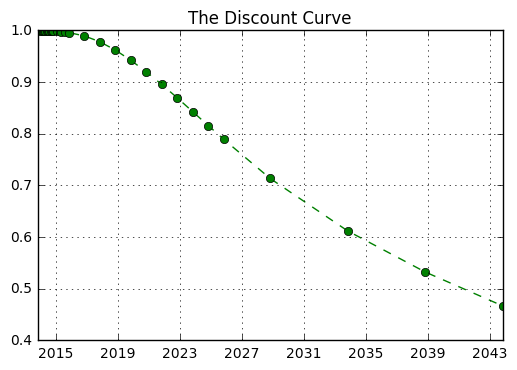

In [181]:
from matplotlib import pyplot as plt
xp = pillar_dates
fp = result.x
plt.plot(xp, fp, 'g--o')
plt.title('The Discount Curve')
plt.grid()
plt.show()

In [182]:
from finmarkets import ForwardRateCurve
fwd_rates=[]
fwd_dates=[]
for i in euribor_6m:
    fwd_rates.append(i ['rate'])
    fwd_dates.append(i ['date'])

fwd_curve=ForwardRateCurve(fwd_dates,fwd_rates)


In [183]:
from matplotlib import pyplot as plt
xfwd = fwd_dates
ffwd = fwd_rates
plt.plot(xfwd, ffwd, 'g--o')
plt.title('The fwd Curve')
plt.grid()
plt.show()

In [184]:
from finmarkets import CreditCurve
ndp_rates=[]
ndp_dates=[]
for i in survival_probabilities:
    ndp_rates.append(i ['ndp'])
    ndp_dates.append(i ['date'])

ndp_curve=CreditCurve( ndp_dates,ndp_rates)


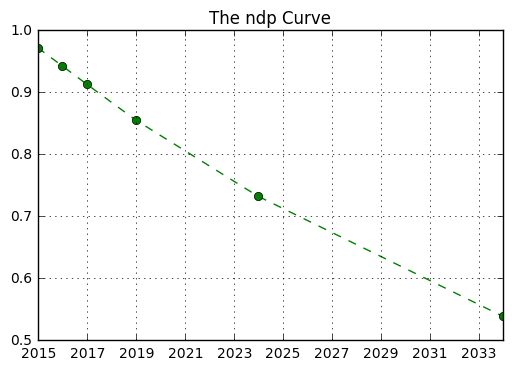

In [185]:
from matplotlib import pyplot as plt
xndp = ndp_dates
fndp = ndp_rates
plt.plot(xndp, fndp, 'g--o')
plt.title('The ndp Curve')
plt.grid()
plt.show()

In [186]:
curve = DiscountCurve(today, pillar_dates, result.x)

cc_dates=[] #current coupon dates
ccs=[]#current coupon times discount factor
n_coupons4bond=[]
delta4bond=[]
couponfwd_dates=[]
coupon_fwds=[]#coupon non scontati
notionals=[]
finals=[]
notional=0
d_c=0#discounted coupon

for i in bonds_to_price:
    start_date=i['start_date']
    cc=i['current_coupon']
    N=i['nominal']
    end_date=i['end_date']
    m=i['margin']
    rr=i['recovery']
    
    diff=(today-start_date).days#to find current coupon date
    r=diff%180
    k=180-r
    cc_date=(today + relativedelta(days = k))
    cc_dates.append(cc_date)
    

    d_c=(((cc+m)*N)/2)*curve.df(cc_date)#to find (current coupon+margin) npvalue
    ccs.append(d_c)
    
    
    n_coupon=((end_date-cc_date).days)//180#to find number of coupons
    n_coupons4bond.append(n_coupon)
    
    
    delta_end_last=(((end_date-cc_date).days)%180)#period from last coupon and end date
    delta4bond.append(delta_end_last)
    
    
    npv_coupon=0
    
    for i in range(1, n_coupon+1):
        couponfwd_date=(cc_date+ relativedelta(days=180*i))#to find coupon date
        couponfwd_dates.append(couponfwd_date)
        if couponfwd_date<(end_date):
            coupon_fwd=N*(((fwd_curve.forward_rate(couponfwd_date)+m)*0.5)*curve.df(couponfwd_date)*exp((-(1-rr)*(ndp_curve.hazard(couponfwd_date))*0.5)))#discounted coupon
            coupon_fwds.append(coupon_fwd)
        npv_coupon = npv_coupon +coupon_fwd
   
    notional=N*curve.df(end_date)*exp((-(1-rr)*(ndp_curve.hazard(end_date))*delta_end_last/360))#to find NPV notionals
    notionals.append(notional)   
    
    final= npv_coupon+notional+d_c 
    
    finals.append(final)
Total=sum(finals)
for i, x in enumerate(finals):
    i+=1
    print("Bond Market Value %s : " % i, round(x,2))        
print("Portfolio Market Value: %s  " % round(Total,2))   

Bond Market Value 1 :  5622076.29
Bond Market Value 2 :  8319159.9
Bond Market Value 3 :  7613408.95
Bond Market Value 4 :  7212520.87
Bond Market Value 5 :  5497012.47
Bond Market Value 6 :  2899322.23
Bond Market Value 7 :  3849592.99
Bond Market Value 8 :  7390553.57
Bond Market Value 9 :  7137818.27
Bond Market Value 10 :  7392284.03
Bond Market Value 11 :  2754901.29
Bond Market Value 12 :  3853242.15
Bond Market Value 13 :  3302517.68
Bond Market Value 14 :  6848044.71
Bond Market Value 15 :  3521175.34
Portfolio Market Value: 83213630.73  


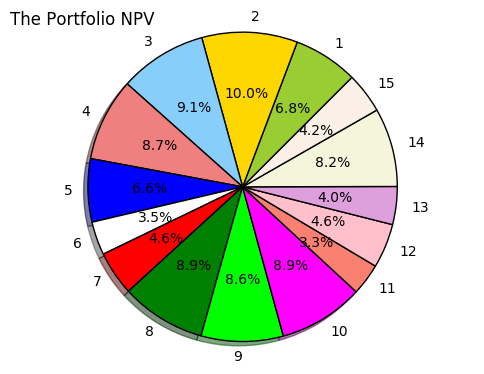

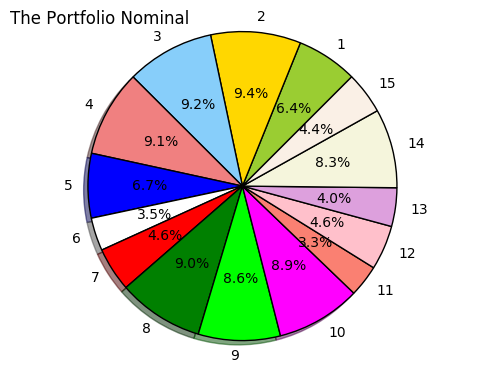

In [187]:

Bond_index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
Bond_values=[5622076.29,8319159.9,7613408.95,7212520.87,5497012.47,
             2899322.23,3849592.99,7390553.57,7137818.27,7392284.03,
             2754901.29,3853242.15,3302517.68,6848044.71,3521175.34]
labels = Bond_index
sizes = Bond_values
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'blue', 'white', 'red',
          'green', 'lime', 'magenta', 'salmon', 'pink', 'plum', 'beige', 'linen']
fig1, ax1 = plt.subplots()
plt.title('The Portfolio NPV', loc='left' )
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%',
        shadow= True, startangle=45)
ax1.axis('equal') 
plt.show()

nominal_list=[4972284.02, 7344328.27, 7172290.19, 7065224.23, 5256452.14, 2689680.89, 3593518.71, 6993589.53, 6684377.52, 6896199.04, 2587984.6, 3621656.1, 3146567.47, 6452721.61, 3418346.24]
labels = Bond_index
sizes = nominal_list
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'blue', 'white', 'red',
          'green', 'lime', 'magenta', 'salmon', 'pink', 'plum', 'beige', 'linen']
fig1, ax1 = plt.subplots()
plt.title('The Portfolio Nominal', loc='left' )
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal') 
plt.show()

In [194]:
#the purpose of the graphs above is to highlight the composition of our PTF, firstly regard the NPV, secondly regard Nominal Values